#1. Calculate the Average Rating according to the current comments and compare it with the existing average rating.


In [1]:
# libraries
import pandas as pd
import math
import scipy.stats as st

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [9]:
df = pd.read_csv("amazon_review.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0000,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0000,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0000,best deal around,1373673600,2013-07-13,513,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


In [19]:
df["overall"].value_counts() # product ratings quantities

5.0000    3922
4.0000     527
1.0000     244
3.0000     142
2.0000      80
Name: overall, dtype: int64

*average rating*

In [7]:
df["overall"].mean() 

4.587589013224822

# Defining a time based weight avarage

In [8]:
df.loc[df["day_diff"] <= df["day_diff"].quantile(0.25), "overall"].mean() * 28 / 100 + \
df.loc[(df["day_diff"] > df["day_diff"].quantile(0.25)) & (df["day_diff"] <= df["day_diff"].quantile(0.50)), "overall"].mean() * 27 / 100 + \
df.loc[(df["day_diff"] > df["day_diff"].quantile(0.50)) & (df["day_diff"] <= df["day_diff"].quantile(0.75)), "overall"].mean() * 23 / 100 + \
df.loc[(df["day_diff"] > df["day_diff"].quantile(0.75)), "overall"].mean() * 22 / 100

4.596237959128027

# 2. Specify 20 reviews for the product to be displayed on the product detail page.


In [11]:
# we need binary expression for "wilson lower bound"
df["helpful_no"] = df["total_vote"] - df["helpful_yes"]
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,helpful_no
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0000,Four Stars,1406073600,2014-07-23,138,0,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0000,nothing to really say....,1356220800,2012-12-23,715,0,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0000,best deal around,1373673600,2013-07-13,513,0,0,0


# Wilson Lower Bound Score
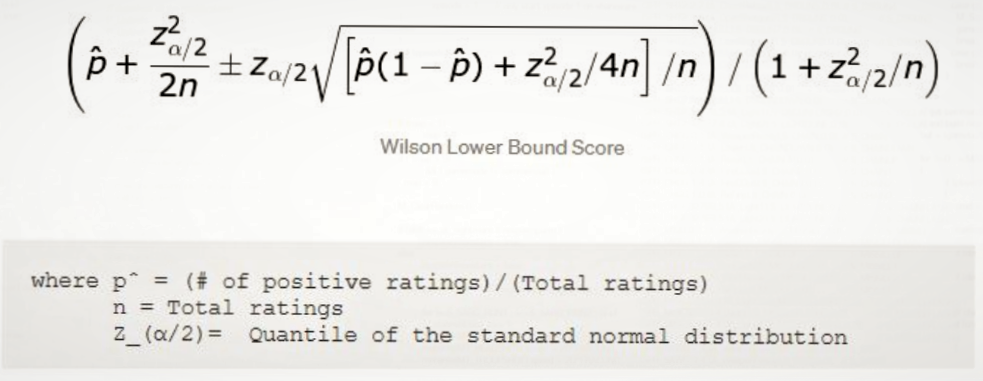

In [12]:
def wilson_lower_bound(up, down, confidence=0.95): # confidence: Confidence interval, by default is 95 %
    n = up + down
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * up / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)

df["wilson_lower_bound"] = df.apply(lambda row: wilson_lower_bound(row["helpful_yes"], row["helpful_no"]), axis=1)

In [13]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,helpful_no,wilson_lower_bound
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0000,Four Stars,1406073600,2014-07-23,138,0,0,0,0.0000
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0,0.0000
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0000,nothing to really say....,1356220800,2012-12-23,715,0,0,0,0.0000
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0,0.0000
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0000,best deal around,1373673600,2013-07-13,513,0,0,0,0.0000


*top 20 reviews*

In [14]:
pd.set_option("display.max_colwidth", 200)
df[["reviewText","wilson_lower_bound"]].sort_values(by="wilson_lower_bound", ascending=False).head(20)

,reviewText,wilson_lower_bound
2031,"[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father's Day and I've been loving it ever since. Just as other with Samsung products, the Galaxy Tab 4 has the abili...",0.9575
3449,"I have tested dozens of SDHC and micro-SDHC cards. One disturbing trend I noticed is that: the speed class rating for micro-SDHC is typically inflated. For example, a 'class-10' rating means the c...",0.9365
4212,NOTE: please read the last update (scroll to the bottom) - I'm leaving this review as 1 star as it appears to help others who purchased and had a similar experience.I give SanDisk 5 stars for cus...,0.9121
317,"If your card gets hot enough to be painful, it is defective and you need to contact SanDisk!From my experience, the larger micro SDs run hot on format and writing, but not to the pain threshold!I ...",0.8186
4672,"Sandisk announcement of the first 128GB micro SD took internet by storm. Our phones evolved into multimedia powerhouses with 5.5&#34;-6&#34; displays, desktop grade processing power, OTG support f...",0.8081
1835,Bought from BestBuy online the day it was announced. I have tested in my Sony Xperia Z Ultra and my 12inch Samsung Pro tablet.Both work fine. Shows 119GB available. Only issue I have is that I pai...,0.7847
3981,The last few days I have been diligently shopping for a MicroSDXC card to utilize in my new smart phone. I have a long term positive experience using SanDisk cards. I quickly became confused about...,0.7321
3807,"I bought this card to replace a lost 16 gig in my phone, (HTC G2). Seems to be working perfectly, so I will recommend to all. WAIT!!! read on...I had this card in my phone for a little over a mont...",0.7004
4306,"While I got this card as a ""deal of the day"" on Amazon, I would gladly pay $79.99 for it!With that said, there has been some skepticism related to the serial number of the card as it is displayed ...",0.6703
4596,"Hi:I ordered two card and they arrived the next day, even faster than Prime. Unfortunatey, this 64gb MicroSD card is designed to only work with ex-fat. If you're an ex-fat fan and don't ever plan ...",0.6636
